Human Resources Analytics (Simulated) Dataset

https://www.kaggle.com/ludobenistant/hr-analytics

In [1]:
#imports
from __future__ import print_function, division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import datatime

%matplotlib inline

In [2]:
ls ../data

HR_comma_sep.csv


Let's read in the data and see what we're working with:

In [3]:
df = pd.read_csv('../data/HR_comma_sep.csv')

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

Let's look at some of the variables to see what they mean, how they're measuring, and/or what kinds of variables they are.

In [6]:
df['left'].describe()

count    14999.000000
mean         0.238083
std          0.425924
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: left, dtype: float64

So it looks like for `left`, 1 means they left and 0 means they're still at the company.

In [7]:
df['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

`satisfaction_level` seems to be a value from 0.09 to 1.00 (or none of the entries gave it a 0.00 score).

In [8]:
type(df['satisfaction_level'])

pandas.core.series.Series

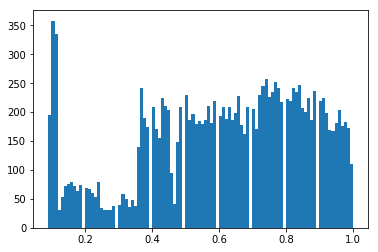

In [9]:
plt.hist(df['satisfaction_level'], bins=100);

In [10]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [11]:
df['last_evaluation'].describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

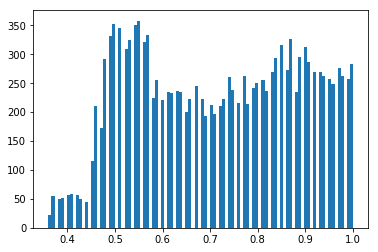

In [16]:
plt.hist(df['last_evaluation'], bins=100);

`last_evalution` seems to be another variable between 0.36 and 1.00. So I'm not sure what this means? For now, I'll take it as a just a relative amount of time.

In [13]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

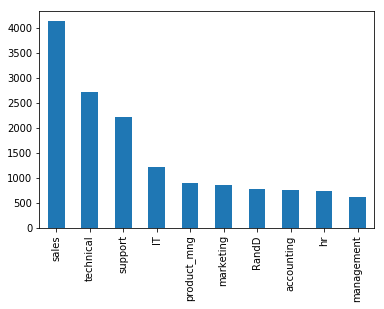

In [17]:
df['sales'].value_counts().plot(kind='bar')

In [14]:
df['number_project'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

So `number_project` could be number of projects worked on through-out her/his time spent at the company, or the number or projects they're currently working on. I'll assume it's the former.

In [15]:
df['time_spend_company'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [42]:
tsc = df['time_spend_company'].value_counts().copy()
#tsc_zeros = pd.Series(np.zeros(2), index=[1,9]) # this changes it to float
tsc_zeros = pd.Series([0,0], index=[1,9])
tsc = tsc.append(tsc_zeros).sort_index(axis=0).copy()
tsc

1        0
2     3244
3     6443
4     2557
5     1473
6      718
7      188
8      162
9        0
10     214
dtype: int64

Perhaps `time_spend_company` means the years spent working here?

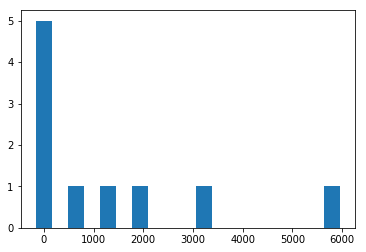

In [43]:
plt.hist(tsc, bins=10, align='left', rwidth=0.5);

In [39]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [41]:
def impute_salary(s):
    if s == 'low':
        return 0
    if s == 'medium':
        return 1
    if s == 'high':
        return 2
    else:
        return -1
    
df['salary'] = df['salary'].apply(lambda x: impute_salary(x))
df['salary'].value_counts()

0    7316
1    6446
2    1237
Name: salary, dtype: int64

In [43]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [45]:
df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [ ]:
df['projects_over_time'] = df['number_project']/df['time_spend_company']
df['proce']